### Step 1: Install SHAP (SHapley Additive Explanations)


In [8]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


### Step 2: Import SHAP and load trained model/vectorizer


In [9]:
import shap
import joblib

# Load trained model and vectorizer
model = joblib.load("../models/multilabel_model.pkl")
vectorizer = joblib.load("../models/vectorizer.pkl")



### Step 3: Select one class and prepare data for SHAP explanation


In [10]:
import pandas as pd

# Load original data again
df = pd.read_csv("../data/medical_reports.csv")
labels = df.columns[1:]

# Prepare feature matrix again
X = vectorizer.transform(df['report_text'].str.lower().str.replace('\n', ' ', regex=True))

# Select the model for one label
selected_label_index = 0
selected_label = labels[selected_label_index]

# Get the binary target for that label
y = df[selected_label]

# Extract the estimator for this specific label
estimator = model.estimators_[selected_label_index]


In [11]:
print(f"Selected label: {selected_label}")
print(f"Estimator type: {type(estimator)}")
print(f"Number of samples in X: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")


Selected label: diabetes
Estimator type: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Number of samples in X: 200
Number of features: 42


### Step 4: Compute SHAP Values for One Label (e.g., Diabetes)

In [12]:
# Convert sparse matrix to dense array (required by SHAP for linear models)
X_dense = X.toarray()

# Create SHAP explainer for the selected estimator
explainer = shap.Explainer(estimator, X_dense, feature_names=vectorizer.get_feature_names_out())

# Compute SHAP values for a few instances
shap_values = explainer(X_dense[:5])


### Step 5: Visualize SHAP Values (Bar Plot)

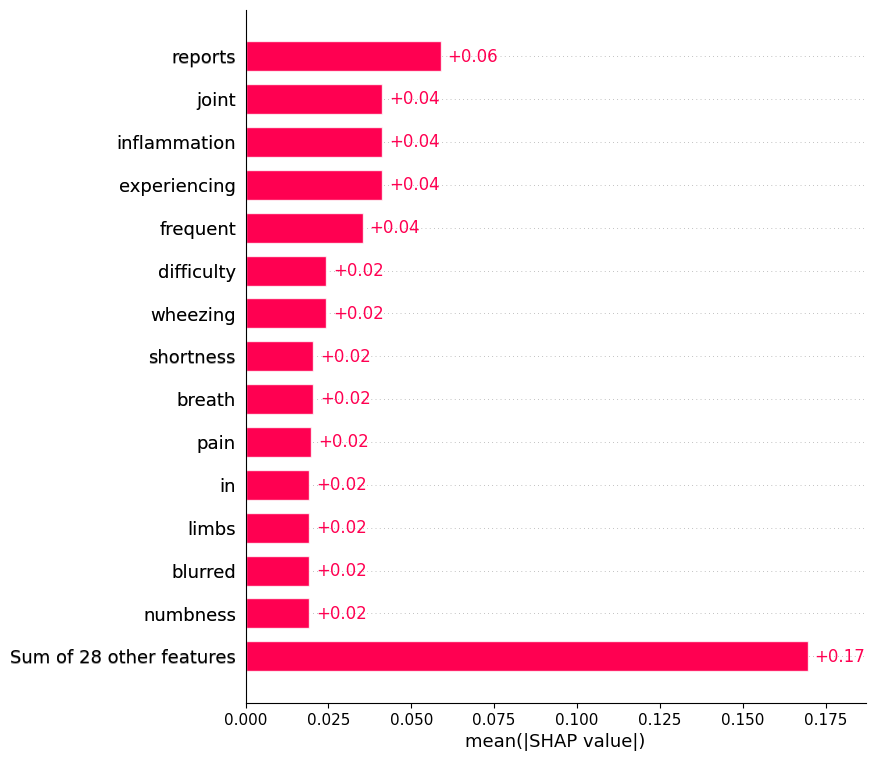

In [13]:
# Bar plot for average feature importance across 5 samples
shap.plots.bar(shap_values, max_display=15)
